In [1]:
freq = 15

In [2]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils
from cg_ega.cg_ega import CG_EGA

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [6]:
len(array_Xtest)

436590

In [7]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [8]:
len(array_Ytest)

436590

In [9]:
model = keras.models.load_model('modelos/modeloGeneral_completo/bidirectional_NO_dropout.h5')

In [10]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [11]:
len(array_Ytest)

436590

13644/13644 [==============================] - 106s 8ms/step


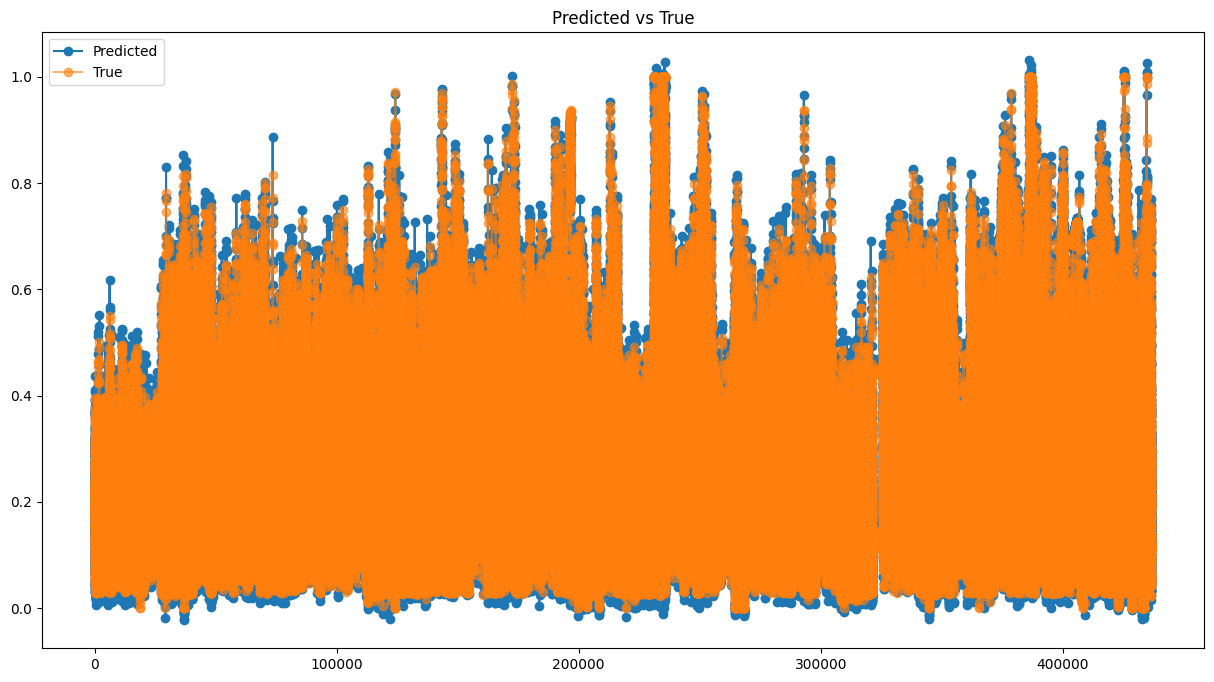

In [12]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [13]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.02826816876982955,
 'mse': 0.038990374730512846,
 'rmse': 0.0015202493216258145}

In [14]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
yhat_df = pd.DataFrame(yhat_scaled, columns=['Glucose level'])
yhat_df

Glucose level
0          146.075928
1          148.468445
2          143.081055
3          146.283188
4          141.520050
...               ...
436585      87.557465
436586     134.790253
436587     170.279266
436588     212.014877
436589     207.888107

[436590 rows x 1 columns]

In [15]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)
array_Ytest_df = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level'])
array_Ytest_df

Glucose level
0               141.0
1               140.0
2               139.0
3               145.0
4               159.0
...               ...
436585          137.0
436586          177.0
436587          198.0
436588          216.0
436589          233.0

[436590 rows x 1 columns]

In [16]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=array_Ytest_df['Glucose level']
dfPlot['y_pred']=yhat_df['Glucose level']
dfPlot.index=pd.date_range("2023-01-01", periods=len(array_Ytest), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   141.0  146.075928
2023-01-01 00:15:00   140.0  148.468445
2023-01-01 00:30:00   139.0  143.081055
2023-01-01 00:45:00   145.0  146.283188
2023-01-01 01:00:00   159.0  141.520050
...                     ...         ...
2035-06-14 18:15:00   137.0   87.557465
2035-06-14 18:30:00   177.0  134.790253
2035-06-14 18:45:00   198.0  170.279266
2035-06-14 19:00:00   216.0  212.014877
2035-06-14 19:15:00   233.0  207.888107

[436590 rows x 2 columns]

AP, BE, EP: (0.907480490804853, 0.06785787090375617, 0.02466163829139076)


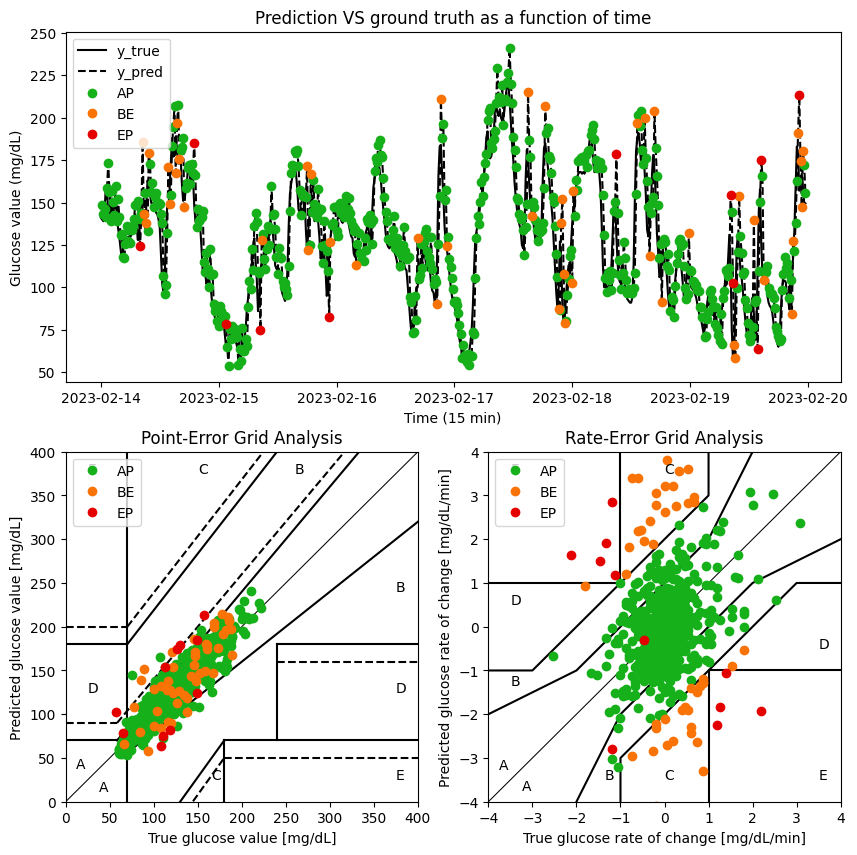

In [17]:
cg_ega = CG_EGA(dfPlot, 15)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

In [18]:
cg_ega.per_sample()

datetime  y_true      y_pred   dy_true   dy_pred CG_EGA  \
0      2023-02-14 00:00:00   141.0  146.075928       NaN       NaN    NaN   
1      2023-02-14 00:15:00   140.0  148.468445 -0.066667  0.159501     AP   
2      2023-02-14 00:30:00   139.0  143.081055 -0.066667 -0.359159     AP   
3      2023-02-14 00:45:00   145.0  146.283188  0.400000  0.213476     AP   
4      2023-02-14 01:00:00   159.0  141.520050  0.933333 -0.317543     AP   
...                    ...     ...         ...       ...       ...    ...   
436585 2035-07-28 18:15:00   137.0   87.557465  2.333333  0.091613     BE   
436586 2035-07-28 18:30:00   177.0  134.790253  2.666667  3.148853     AP   
436587 2035-07-28 18:45:00   198.0  170.279266  1.400000  2.365934     AP   
436588 2035-07-28 19:00:00   216.0  212.014877  1.200000  2.782374     AP   
436589 2035-07-28 19:15:00   233.0  207.888107  1.133333 -0.275118     AP   

       P_EGA R_EGA  
0        NaN   NaN  
1          A     A  
2          A     A  
3          A     A  
4          A     B  
...      ...   ...  
436585     B    lD  
436586     A     A  
436587     A     A  
436588     A     B  
436589     A     B  

[436590 rows x 8 columns]

# Predicción a 30 min del conjunto de pruebas generales

In [19]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [20]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 69ms/step


Glucose level Predict  Glucose level True
0               0.230600            0.219565
1               0.235801            0.217391

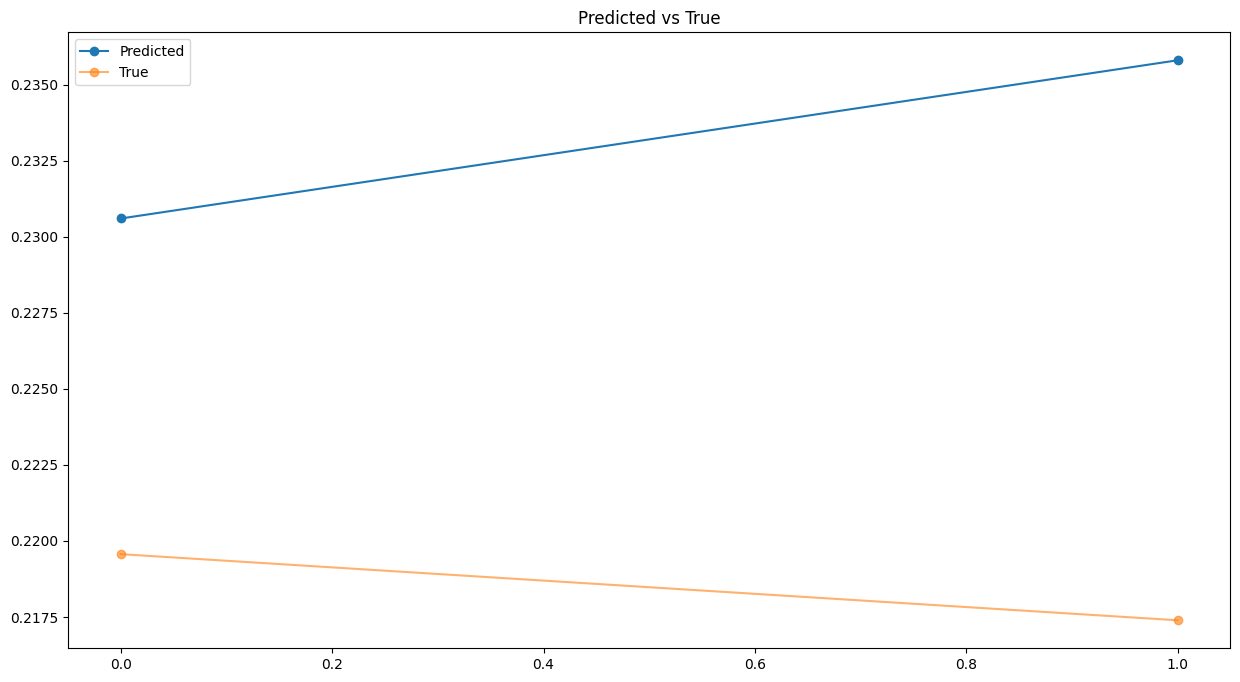

{'mae': 0.014722102945265547,
 'mse': 0.015176889316851926,
 'rmse': 0.00023033796933597412}

In [21]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [22]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             146.075928               141.0
1             148.468414               140.0

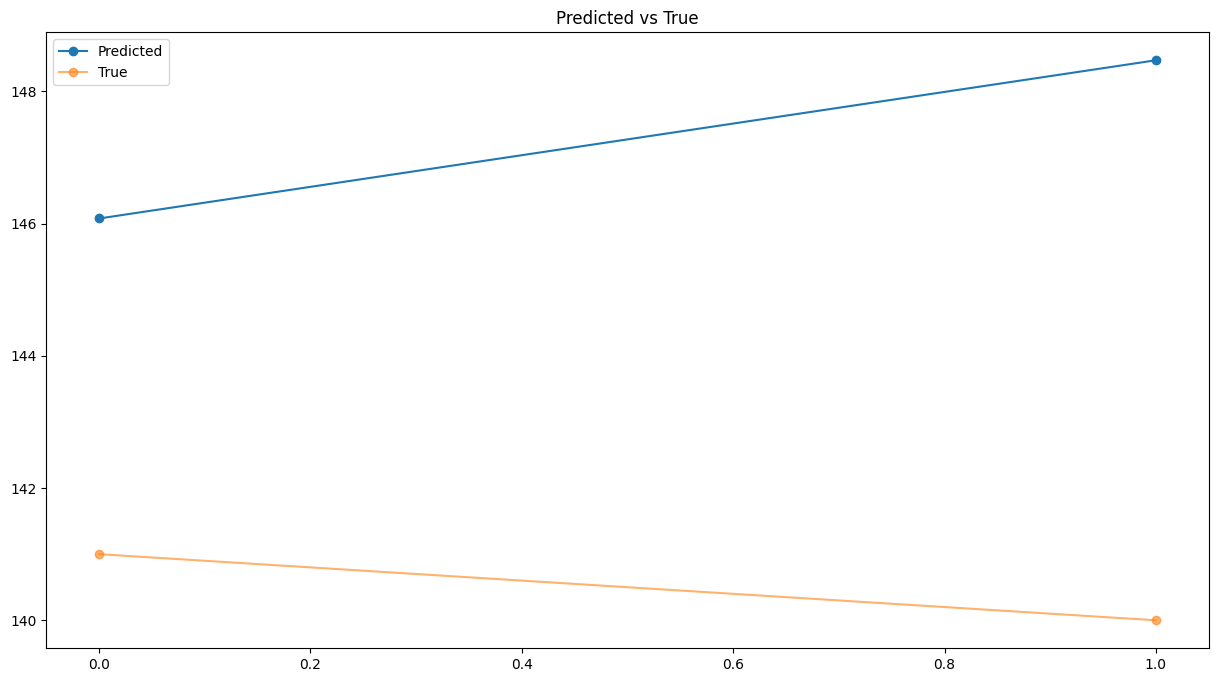

{'mae': 6.7721710205078125,
 'mse': 6.981371041332531,
 'rmse': 48.73954161675647}

In [23]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 30 min del conjunto de pruebas generales

In [24]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 47ms/step


Glucose level Predict  Glucose level True
0               0.230600            0.219565
1               0.249243            0.217391

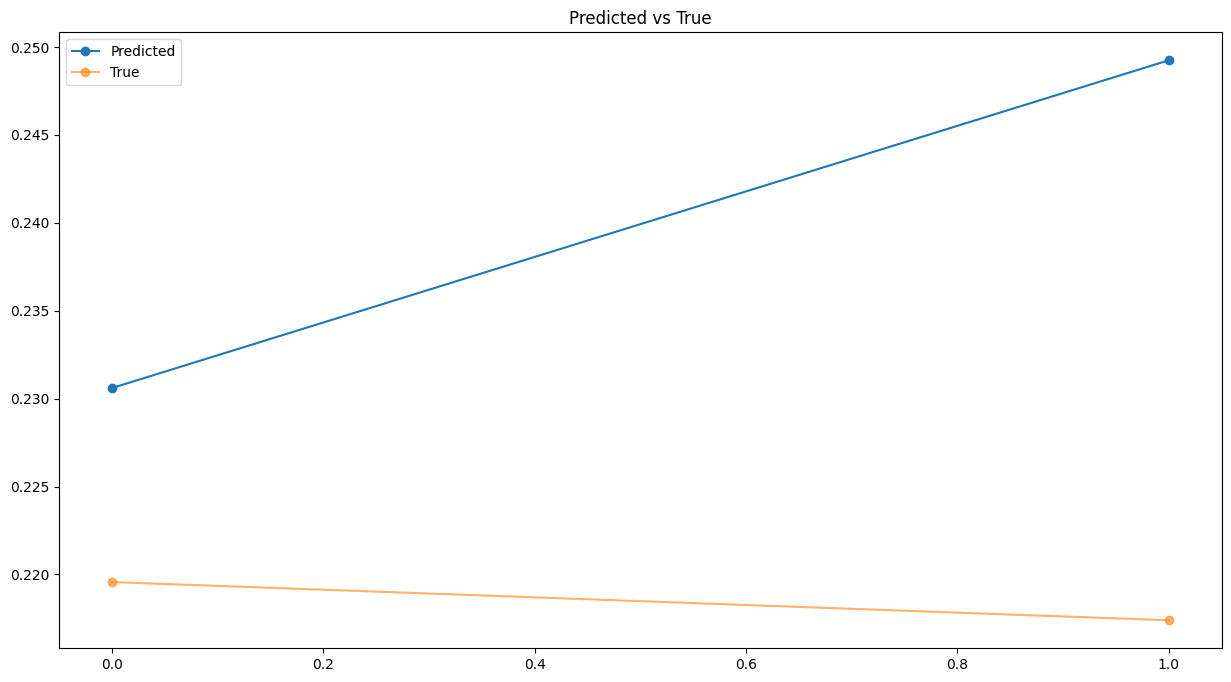

{'mae': 0.021443383460459486,
 'mse': 0.023836123423545658,
 'rmse': 0.000568160779862502}

In [25]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [26]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             146.075928               141.0
1             154.651993               140.0

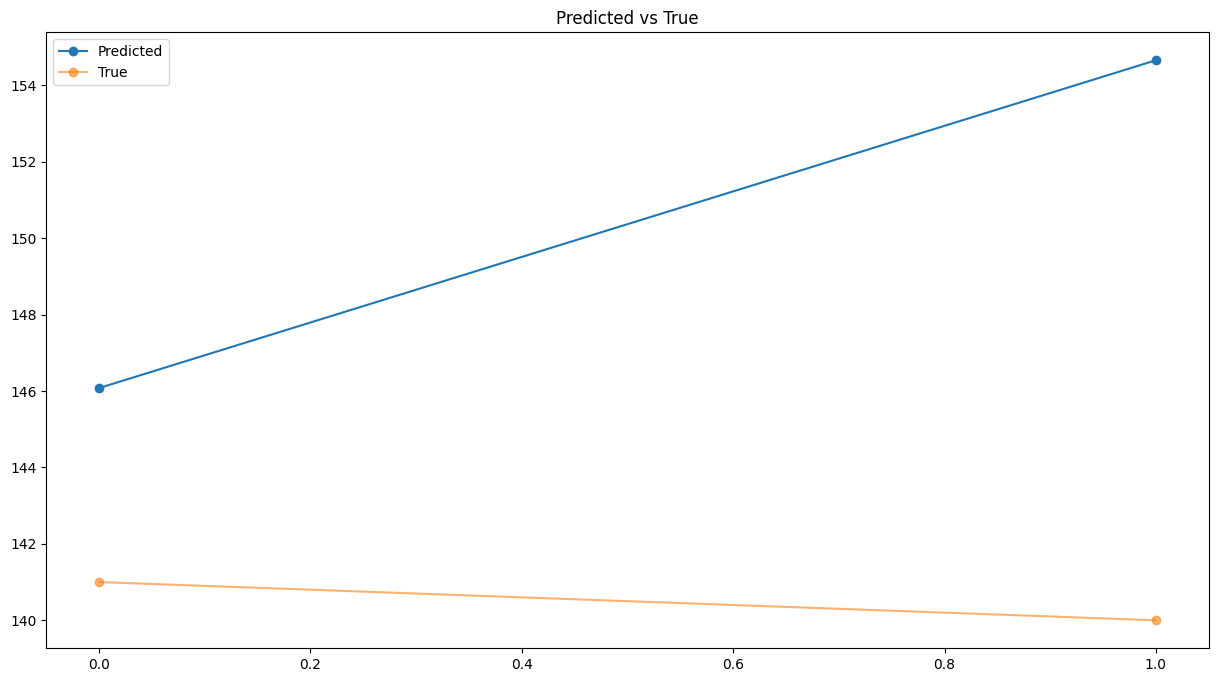

{'mae': 9.863960266113281,
 'mse': 10.964623461681011,
 'rmse': 120.22296765644569}

In [27]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto pruebas del paciente 1

In [28]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [29]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [30]:
len(X)

191

In [31]:
len(Y)

191

In [32]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [33]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

6/6 [==============================] - 0s 9ms/step


Glucose level Predict  Glucose level True
0               0.281654            0.182609
1               0.234406            0.154348
2               0.152083            0.152174
3               0.168920            0.150000
4               0.166344            0.123913

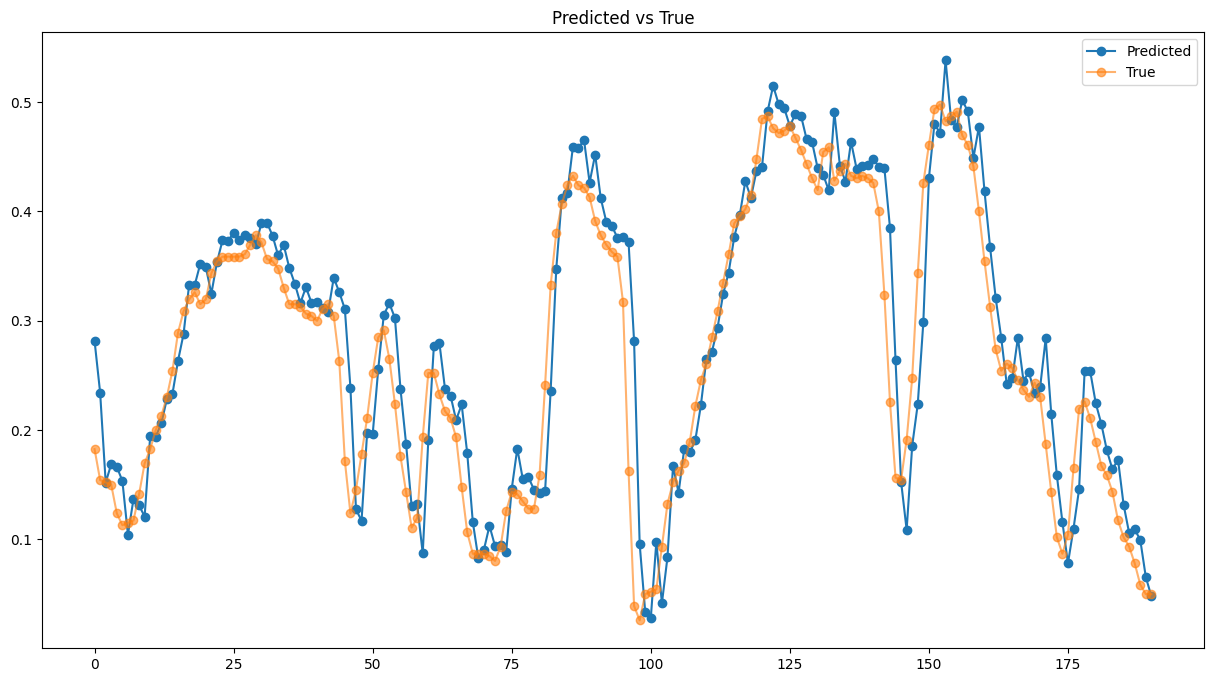

{'mae': 0.03459927522014057,
 'mse': 0.04919883117524265,
 'rmse': 0.0024205249890100282}

In [34]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

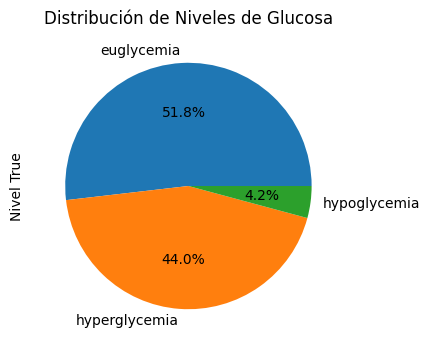

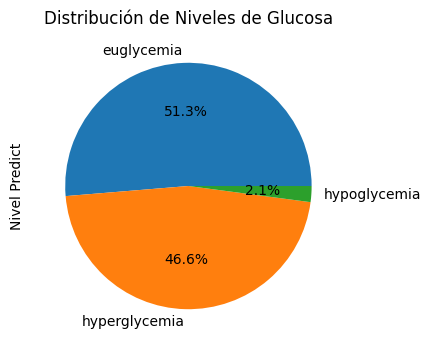

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0               124.0  euglycemia             169.560669    euglycemia
1               111.0  euglycemia             147.826782    euglycemia
2               110.0  euglycemia             109.958405    euglycemia
3               109.0  euglycemia             117.703171    euglycemia
4                97.0  euglycemia             116.518127    euglycemia

In [35]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


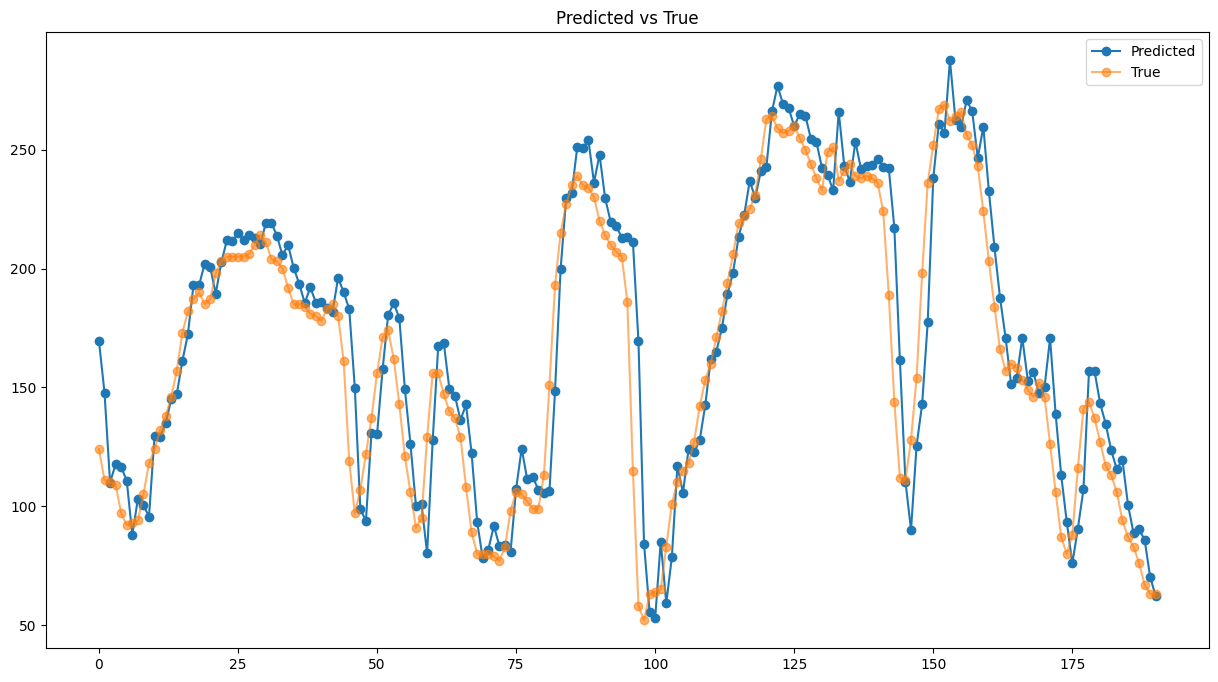

{'mae': 15.915666969658817,
 'mse': 22.631463063000577,
 'rmse': 512.1831203719595}

In [36]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [37]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   124.0  169.560669
2023-01-01 00:15:00   111.0  147.826782
2023-01-01 00:30:00   110.0  109.958405
2023-01-01 00:45:00   109.0  117.703171
2023-01-01 01:00:00    97.0  116.518127
...                     ...         ...
2023-01-02 22:30:00    83.0   88.745285
2023-01-02 22:45:00    76.0   90.213570
2023-01-02 23:00:00    67.0   85.851822
2023-01-02 23:15:00    63.0   70.157257
2023-01-02 23:30:00    63.0   62.095596

[191 rows x 2 columns]

AP, BE, EP: (0.8894736842105263, 0.06842105263157895, 0.042105263157894736)


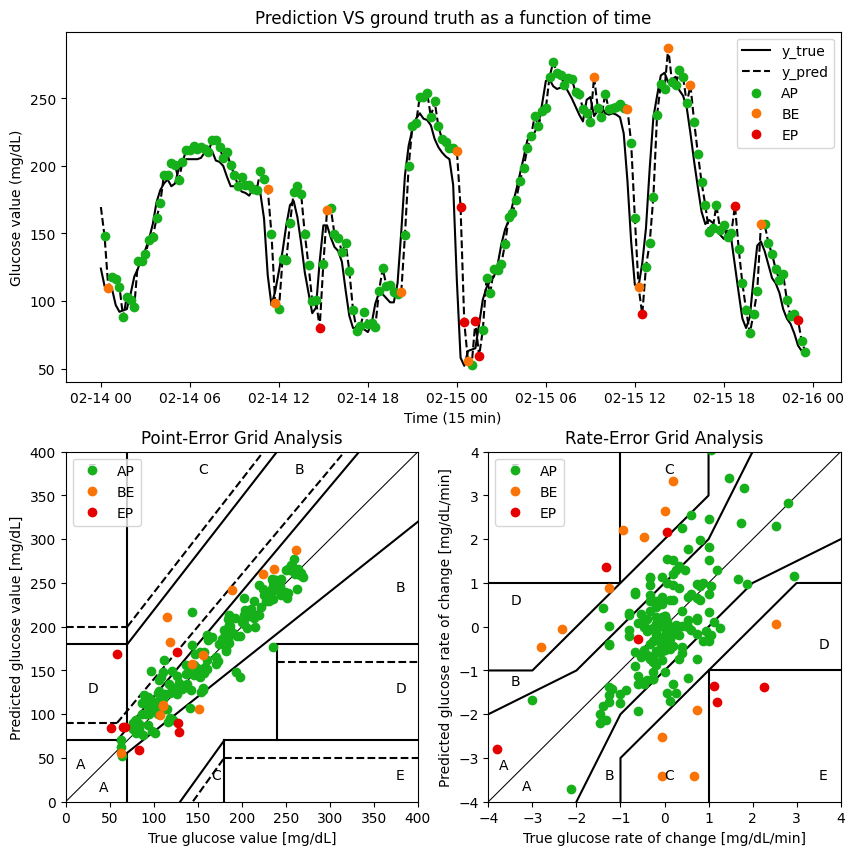

In [38]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 2

In [39]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [40]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [41]:
len(X)

1742

In [42]:
len(Y)

1742

In [43]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [44]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

55/55 [==============================] - 0s 5ms/step


Glucose level Predict  Glucose level True
0               0.340120            0.373913
1               0.392270            0.400000
2               0.402207            0.404348
3               0.449109            0.406522
4               0.418026            0.397826

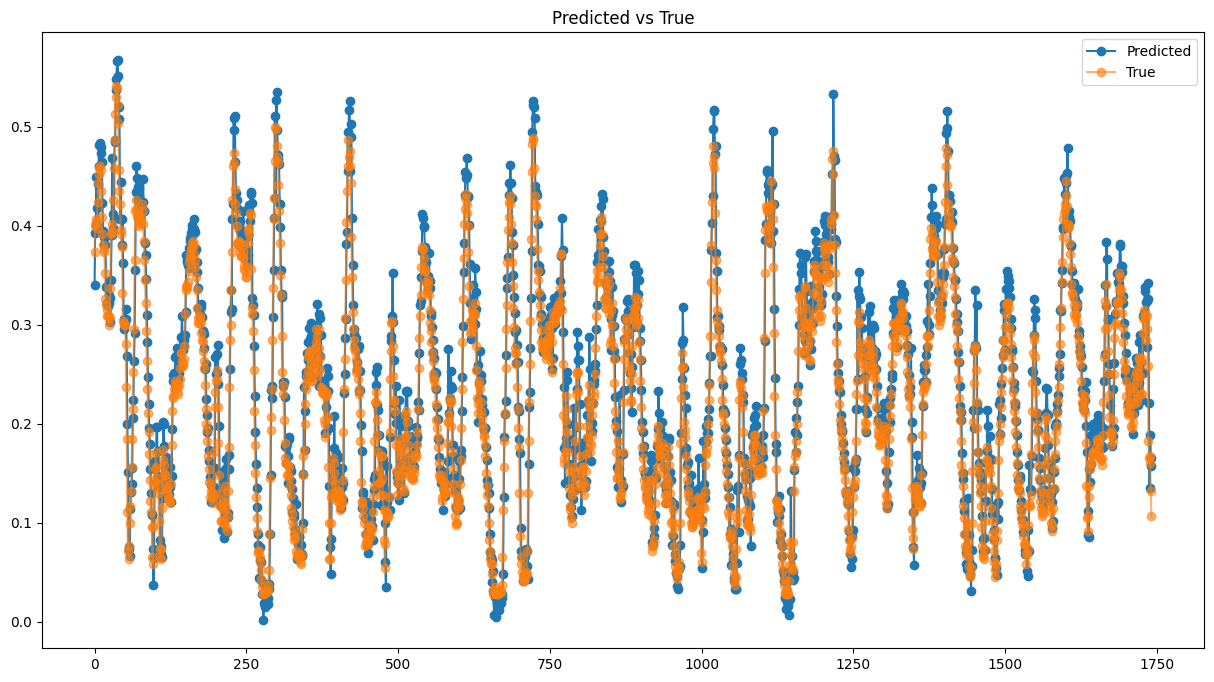

{'mae': 0.02474482685671923,
 'mse': 0.03126896083653479,
 'rmse': 0.0009777479117967466}

In [45]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

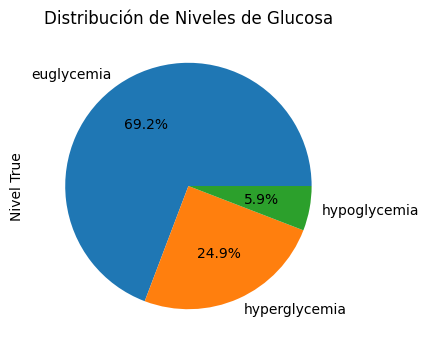

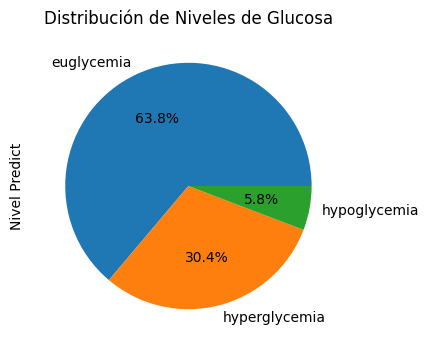

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               212.0  hyperglycemia             196.455048  hyperglycemia
1               224.0  hyperglycemia             220.444366  hyperglycemia
2               226.0  hyperglycemia             225.015305  hyperglycemia
3               227.0  hyperglycemia             246.590225  hyperglycemia
4               223.0  hyperglycemia             232.291794  hyperglycemia

In [46]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


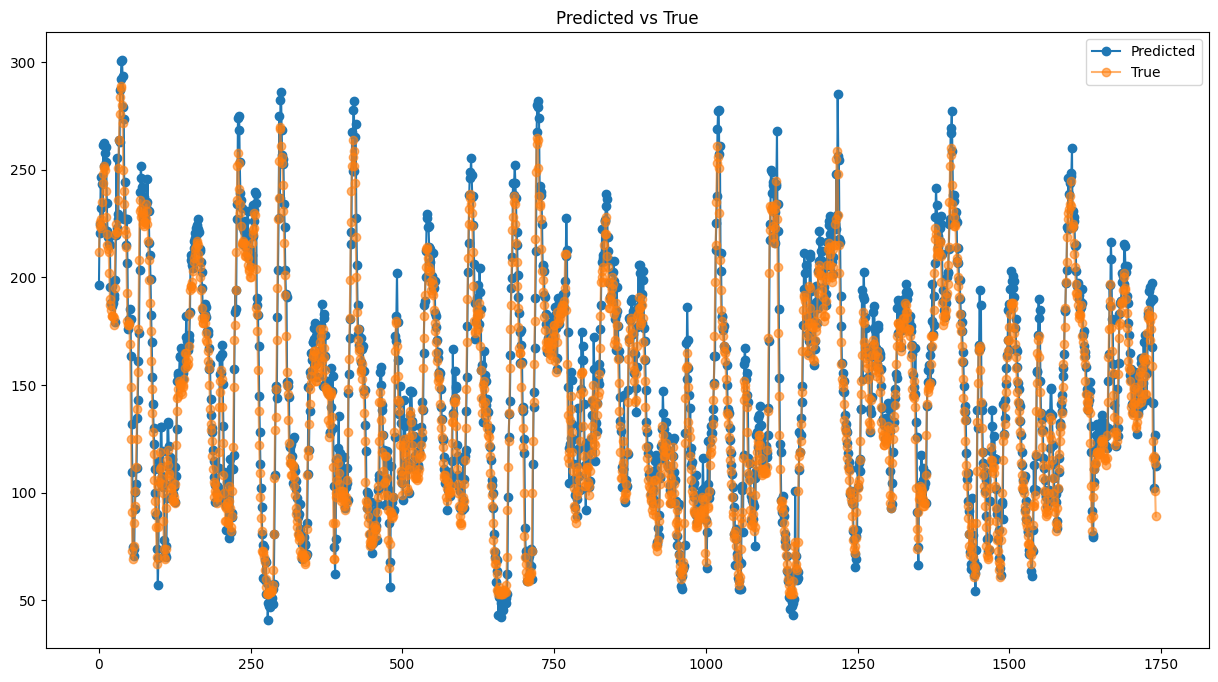

{'mae': 11.382621113878988,
 'mse': 14.38372270853131,
 'rmse': 206.89147895591933}

In [47]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [48]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   212.0  196.455048
2023-01-01 00:15:00   224.0  220.444366
2023-01-01 00:30:00   226.0  225.015305
2023-01-01 00:45:00   227.0  246.590225
2023-01-01 01:00:00   223.0  232.291794
...                     ...         ...
2023-01-19 02:15:00   116.0  141.498718
2023-01-19 02:30:00   117.0  102.263901
2023-01-19 02:45:00   114.0  126.966522
2023-01-19 03:00:00   101.0  116.253487
2023-01-19 03:15:00    89.0  112.579117

[1742 rows x 2 columns]

AP, BE, EP: (0.9471568064330844, 0.04480183802412407, 0.0080413555427915)


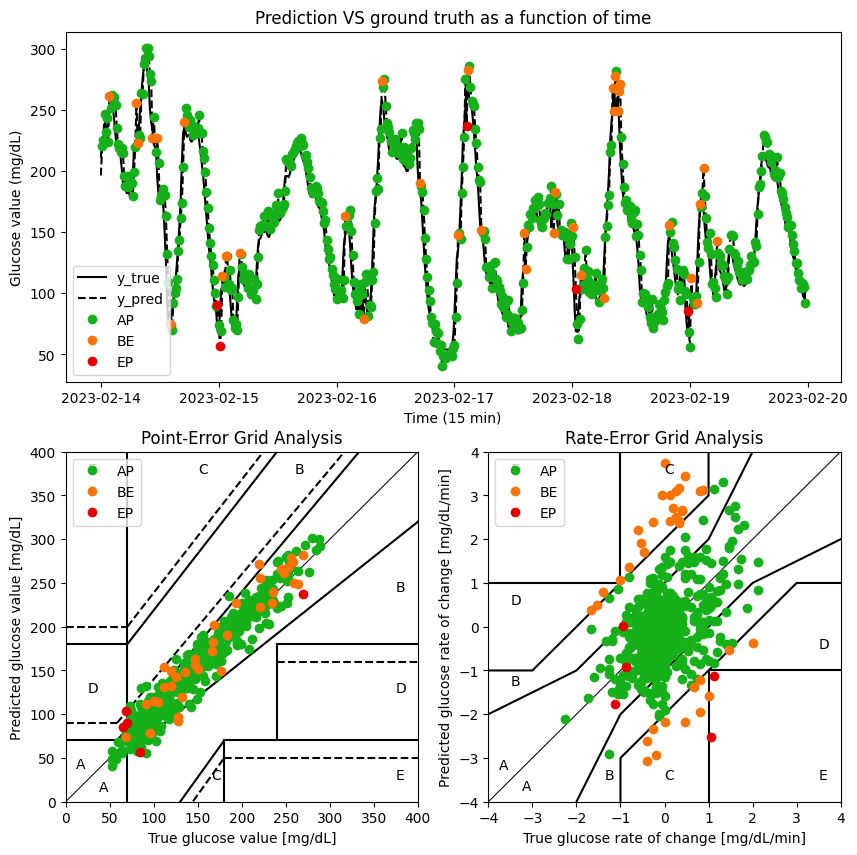

In [49]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 3

In [50]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [51]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [52]:
len(X)

3586

In [53]:
len(Y)

3586

In [54]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [55]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

113/113 [==============================] - 1s 9ms/step


Glucose level Predict  Glucose level True
0               0.309453            0.261858
1               0.267806            0.229051
2               0.236599            0.196245
3               0.197673            0.163439
4               0.173597            0.130632

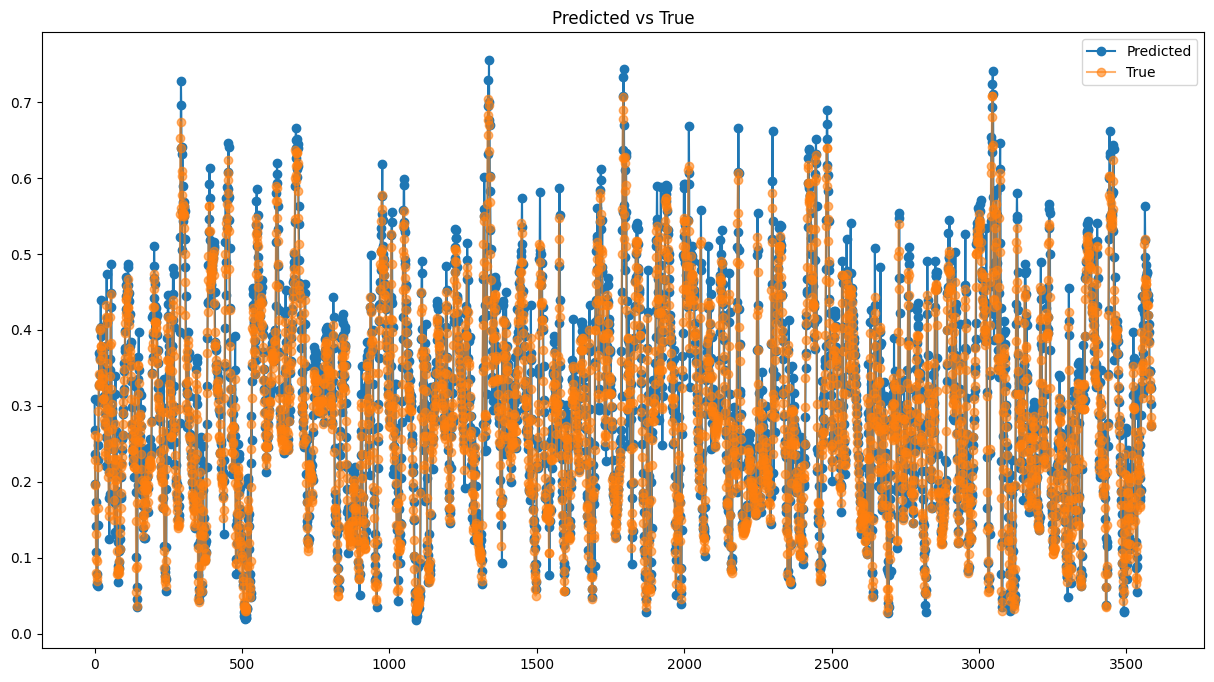

{'mae': 0.035834043127825545,
 'mse': 0.04854710951283426,
 'rmse': 0.0023568218420511227}

In [56]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

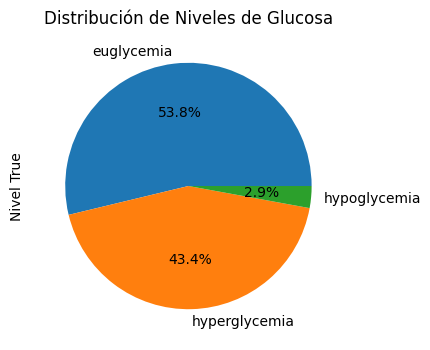

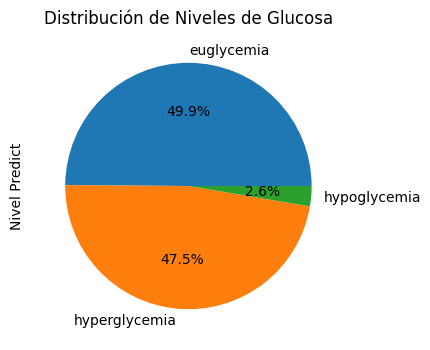

Glucose level True  Nivel True  Glucose level Predict  Nivel Predict
0          160.454545  euglycemia             182.348572  hyperglycemia
1          145.363636  euglycemia             163.190933     euglycemia
2          130.272727  euglycemia             148.835663     euglycemia
3          115.181818  euglycemia             130.929642     euglycemia
4          100.090909  euglycemia             119.854630     euglycemia

In [57]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


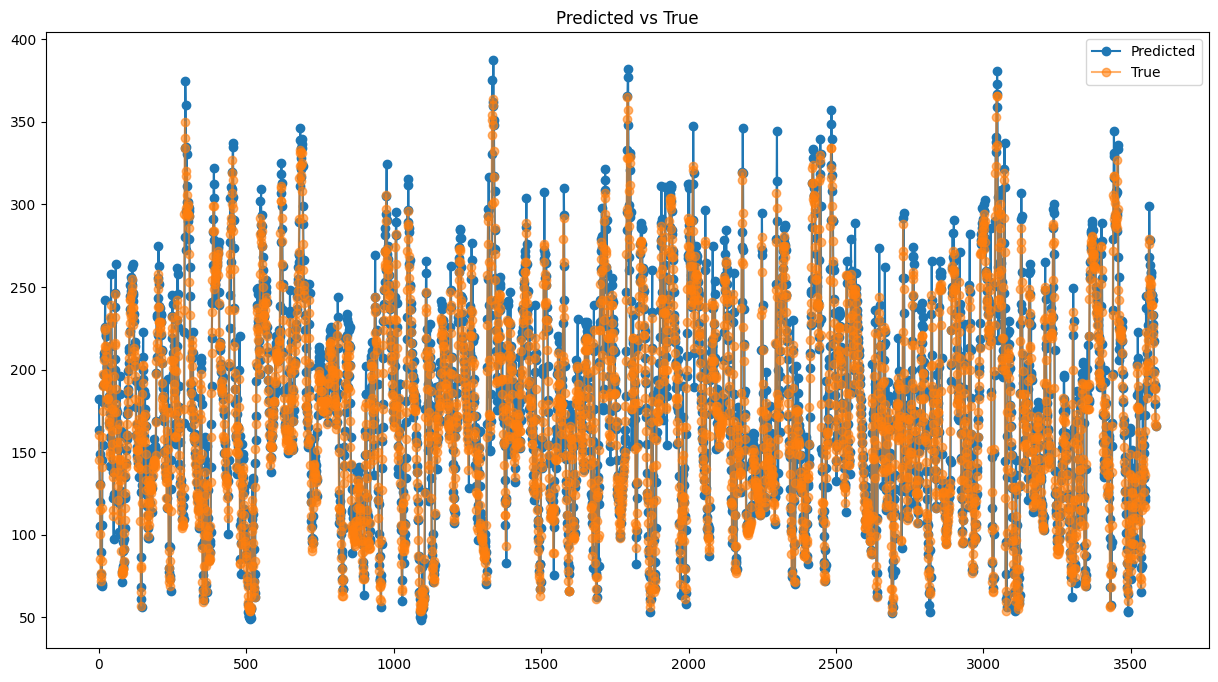

{'mae': 16.483659966984643,
 'mse': 22.331669986967714,
 'rmse': 498.7034844068346}

In [58]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [59]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00  160.454545  182.348572
2023-01-01 00:15:00  145.363636  163.190933
2023-01-01 00:30:00  130.272727  148.835663
2023-01-01 00:45:00  115.181818  130.929642
2023-01-01 01:00:00  100.090909  119.854630
...                         ...         ...
2023-02-07 07:15:00  188.000000  190.815445
2023-02-07 07:30:00  182.000000  189.741562
2023-02-07 07:45:00  171.000000  188.680252
2023-02-07 08:00:00  167.000000  178.935455
2023-02-07 08:15:00  166.000000  165.995468

[3586 rows x 2 columns]

AP, BE, EP: (0.8741980474198048, 0.08591352859135286, 0.039888423988842396)


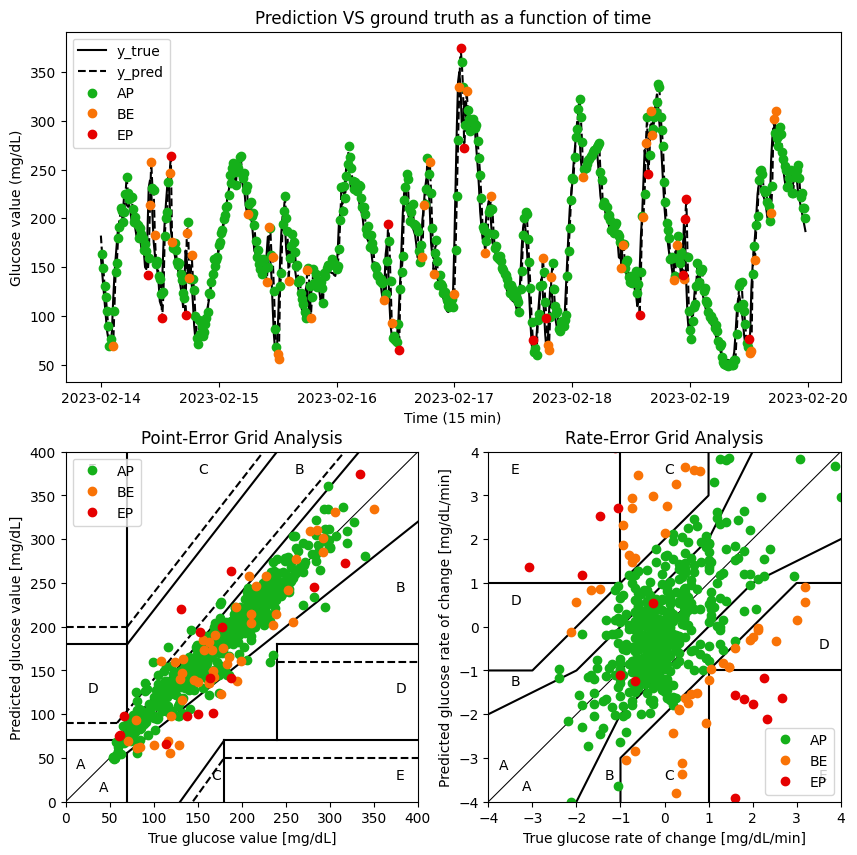

In [60]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 4

In [61]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [62]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [63]:
len(X)

6201

In [64]:
len(Y)

6201

In [65]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [66]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

194/194 [==============================] - 2s 10ms/step


Glucose level Predict  Glucose level True
0               0.557427            0.534783
1               0.557595            0.500000
2               0.546384            0.484783
3               0.477243            0.463043
4               0.501948            0.428261

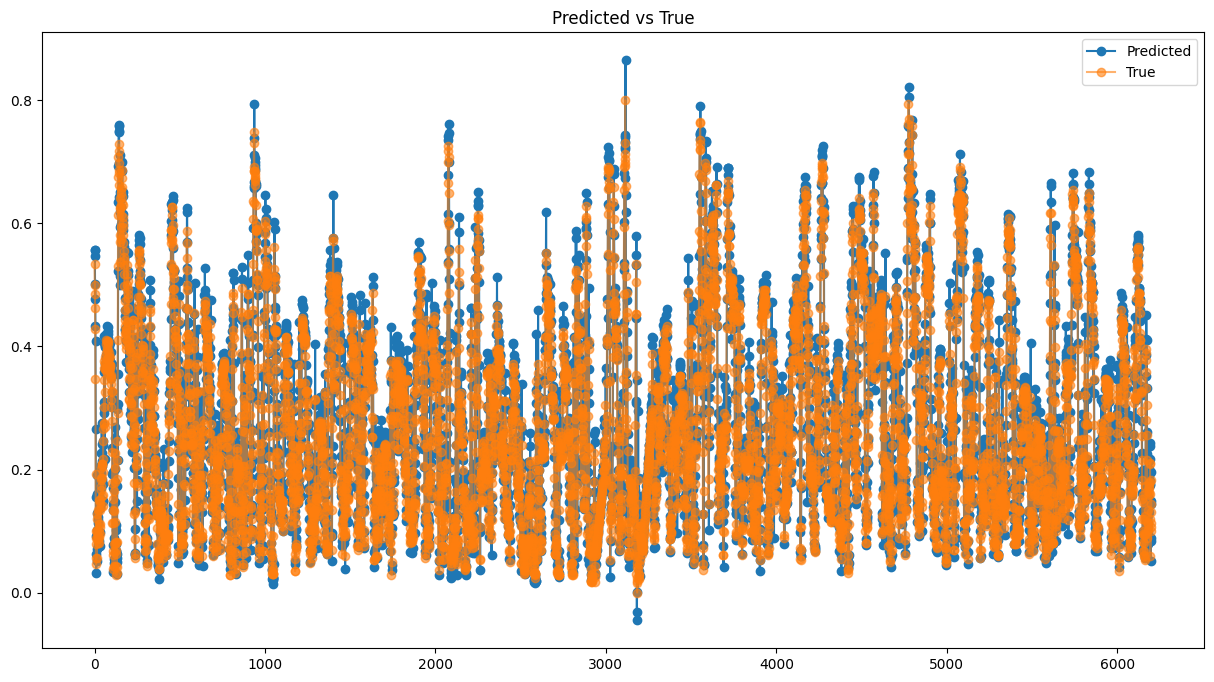

{'mae': 0.038773083839074456,
 'mse': 0.054122648931895626,
 'rmse': 0.002929261127405223}

In [67]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

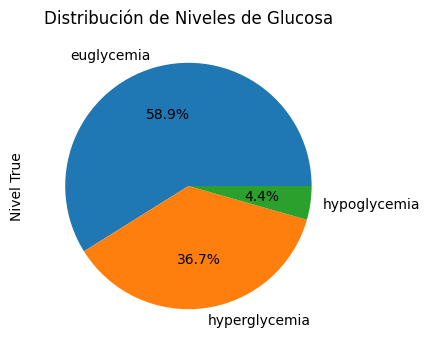

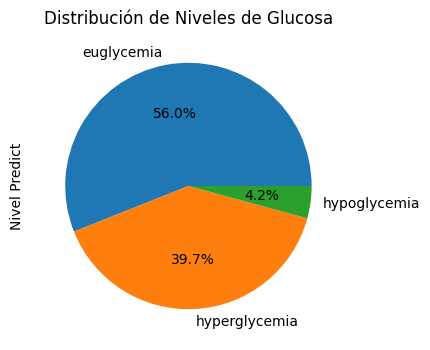

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               286.0  hyperglycemia             296.416321  hyperglycemia
1               270.0  hyperglycemia             296.493500  hyperglycemia
2               263.0  hyperglycemia             291.336487  hyperglycemia
3               253.0  hyperglycemia             259.531921  hyperglycemia
4               237.0  hyperglycemia             270.896057  hyperglycemia

In [68]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


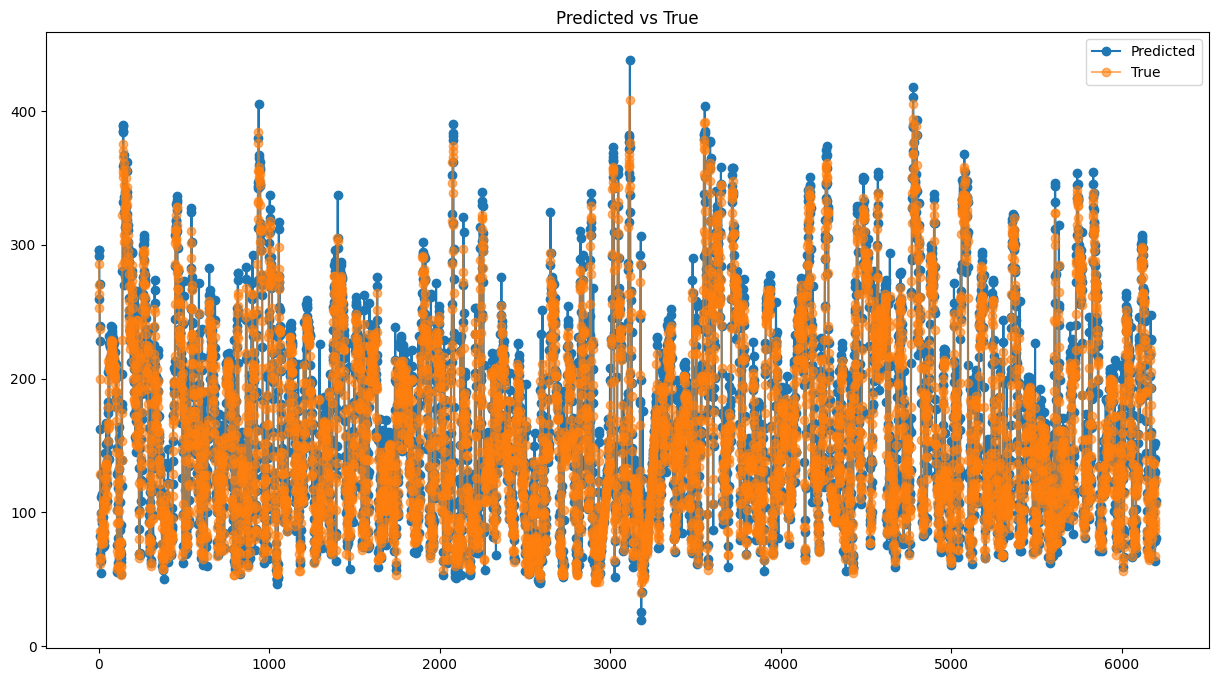

{'mae': 17.835618591258882,
 'mse': 24.89641847925438,
 'rmse': 619.8316530941589}

In [69]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [70]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   286.0  296.416321
2023-01-01 00:15:00   270.0  296.493500
2023-01-01 00:30:00   263.0  291.336487
2023-01-01 00:45:00   253.0  259.531921
2023-01-01 01:00:00   237.0  270.896057
...                     ...         ...
2023-03-06 13:00:00   100.0   63.910976
2023-03-06 13:15:00    89.0  129.956177
2023-03-06 13:30:00    92.0  106.304527
2023-03-06 13:45:00   106.0   80.589546
2023-03-06 14:00:00   124.0  108.815041

[6201 rows x 2 columns]

AP, BE, EP: (0.8258064516129032, 0.11903225806451613, 0.055161290322580644)


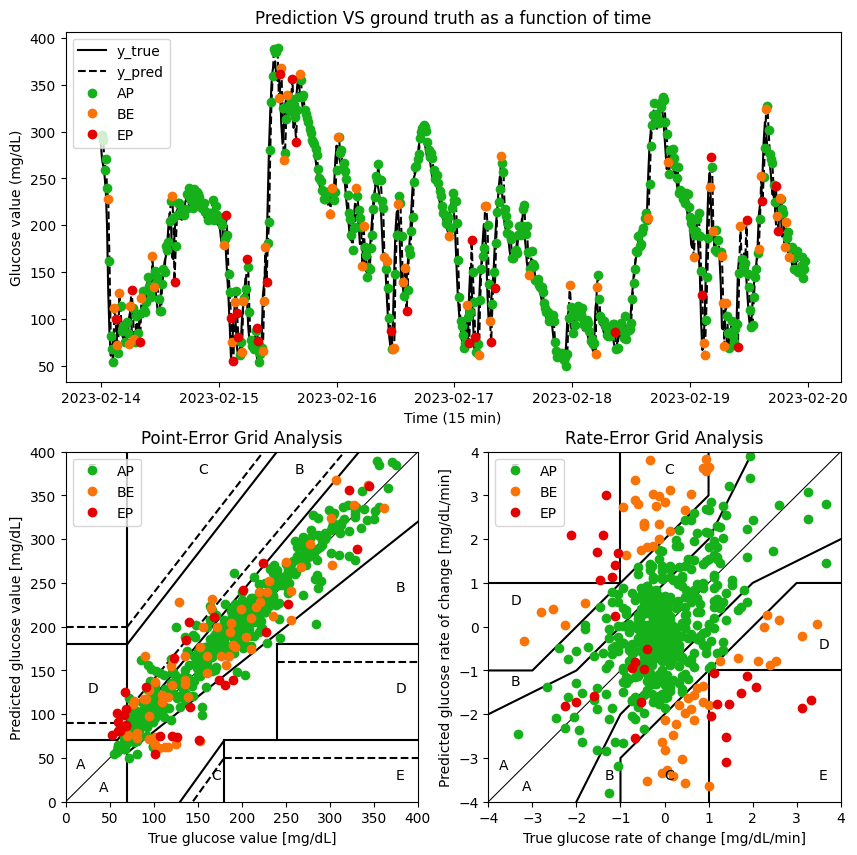

In [71]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)